# **A Hands-On Example of Regularization: Comparing Ridge and Lasso on the California Housing Dataset**

The **California Housing dataset** provides data on house prices in California based on features like the location (latitude, longitude), population, and housing details such as the median income, average number of rooms, etc. Our goal is to predict the **median house value** based on these features.

Let’s walk through the process step by step using the **California Housing dataset**.

### **Step 1: Load and Explore the California Housing Dataset**

We will use Python’s `scikit-learn` to load the dataset and explore it. Here's how to do that:

In [29]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.preprocessing import StandardScaler

# Load the California Housing dataset
california_housing = fetch_california_housing()

# Explore the dataset
X = california_housing.data
y = california_housing.target

# Convert to a pandas dataframe for easier inspection
X_df = pd.DataFrame(X, columns=california_housing.feature_names)
y_df = pd.DataFrame(y, columns=["House Value (in $100,000)"])

# Show the first few rows of the dataset
print(X_df.head())
print(y_df.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
   House Value (in $100,000)
0                      4.526
1                      3.585
2                      3.521
3                      3.413
4                      3.422


### **Understanding the Features**
The features in the California Housing dataset are:

1. **MedInc**: Median income in the area (in $10,000s).
2. **HouseAge**: Average age of houses in the area.
3. **AveRooms**: Average number of rooms per house.
4. **AveOccup**: Average number of people per household.
5. **Lat**: Latitude of the area.
6. **Long**: Longitude of the area.
7. **Population**: Total population of the area.
8. **AveHouseValue**: Median house value in the area (target variable).

The target variable \( y \) is the **Median House Value**, which we’re trying to predict.

### **Step 2: Visualizing the Features and Target**

Let's first take a look at the distribution of the features and the target variable, so we get a sense of what the data looks like.

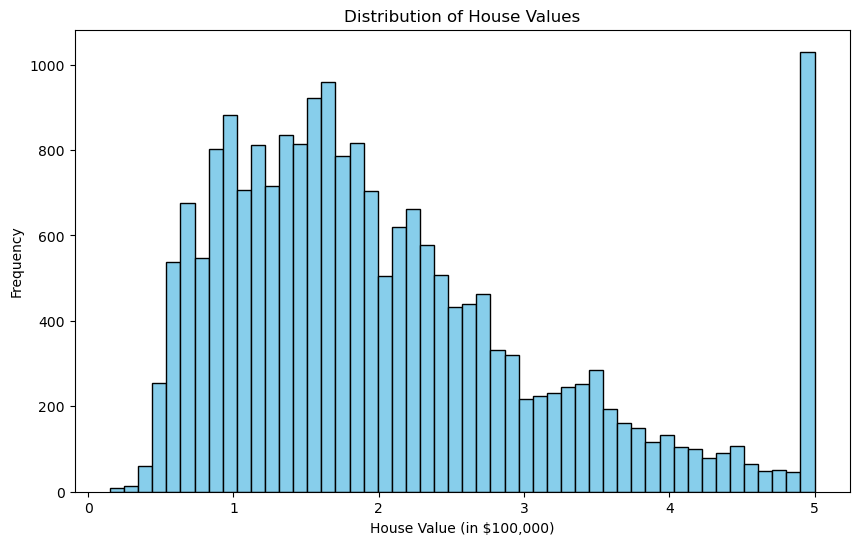

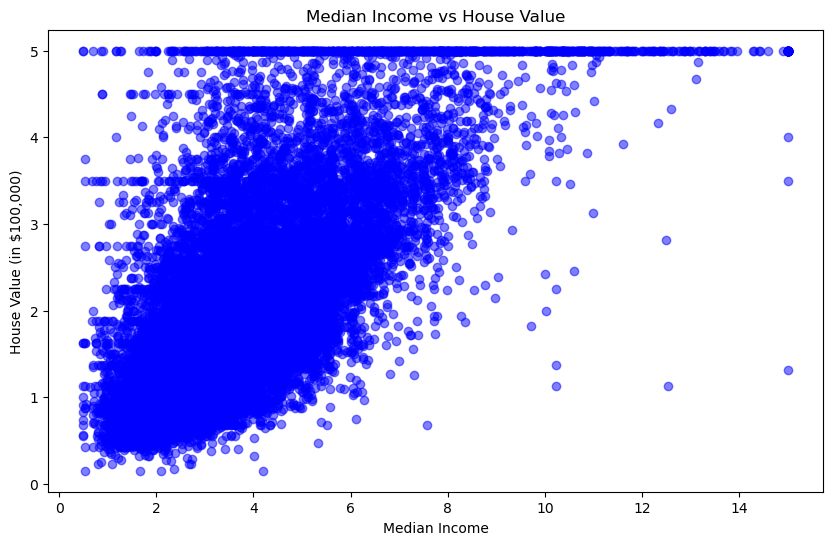

In [33]:
# Visualize the distribution of the target variable (House Value)
plt.figure(figsize=(10, 6))
plt.hist(y, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of House Values')
plt.xlabel('House Value (in $100,000)')
plt.ylabel('Frequency')
plt.show()

# Visualize the relationship between Median Income and House Value
plt.figure(figsize=(10, 6))
plt.scatter(X_df['MedInc'], y, color='blue', alpha=0.5)
plt.title('Median Income vs House Value')
plt.xlabel('Median Income')
plt.ylabel('House Value (in $100,000)')
plt.show()


From these visualizations, we can see that:
- The **house values** are skewed (i.e., there are some very high values that are far from the majority).
- There seems to be a positive correlation between **Median Income** and **House Value**.

### **Step 3: Preparing the Data**

Before applying regularization methods like **Ridge** or **Lasso**, we need to scale the features because regularization methods are sensitive to the scale of the features. Standardization will help put all the features on the same scale.

In [35]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



### **Step 4: Fitting Models with Regularization**

Now, let's fit three different models to the data:
1. **Linear Regression** (no regularization)
2. **Ridge Regression** (L2 regularization)
3. **Lasso Regression** (L1 regularization)

#### **1. Linear Regression (No Regularization)**

First, we’ll fit a simple **Linear Regression** model. This model will not include any regularization.

In [37]:
# Linear Regression (No Regularization)
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Get the coefficients and the intercept
print(f"Linear Regression Coefficients: {linear_reg.coef_}")
print(f"Linear Regression Intercept: {linear_reg.intercept_}")


Linear Regression Coefficients: [ 0.85238169  0.12238224 -0.30511591  0.37113188 -0.00229841 -0.03662363
 -0.89663505 -0.86892682]
Linear Regression Intercept: 2.067862309508389



- The **coefficients** represent the effect of each feature on the house value. For example, if the coefficient for **MedInc** is large, it means that median income has a strong impact on the house value.

#### **2. Ridge Regression (L2 Regularization)**

Now, let’s fit a **Ridge Regression** model. Ridge regression adds a penalty based on the **L2 norm** (squared values of the coefficients) to the loss function.

In [39]:
# Ridge Regression (L2 Regularization)
ridge = Ridge(alpha=1.0)  # alpha controls the strength of regularization
ridge.fit(X_train, y_train)

# Get the coefficients and the intercept
print(f"Ridge Regression Coefficients: {ridge.coef_}")
print(f"Ridge Regression Intercept: {ridge.intercept_}")


Ridge Regression Coefficients: [ 0.85231009  0.12246004 -0.3048709   0.37081855 -0.00227294 -0.03662725
 -0.89588451 -0.86816501]
Ridge Regression Intercept: 2.067863077782602


#### **3. Lasso Regression (L1 Regularization)**

Finally, let’s fit a **Lasso Regression** model. Lasso regression adds a penalty based on the **L1 norm** (absolute values of the coefficients) and can shrink some coefficients to **zero**, effectively selecting only the most important features.

In [41]:
# Lasso Regression (L1 Regularization)
lasso = Lasso(alpha=0.1)  # alpha controls the strength of regularization
lasso.fit(X_train, y_train)

# Get the coefficients and the intercept
print(f"Lasso Regression Coefficients: {lasso.coef_}")
print(f"Lasso Regression Intercept: {lasso.intercept_}")


Lasso Regression Coefficients: [ 0.70918587  0.10647473 -0.          0.         -0.         -0.
 -0.01147904 -0.        ]
Lasso Regression Intercept: 2.068507498694001


### **Step 5: Comparing the Coefficients**

Now, let’s compare the coefficients of all three models. This will show how **Ridge** and **Lasso** affect the coefficients compared to **Linear Regression**.

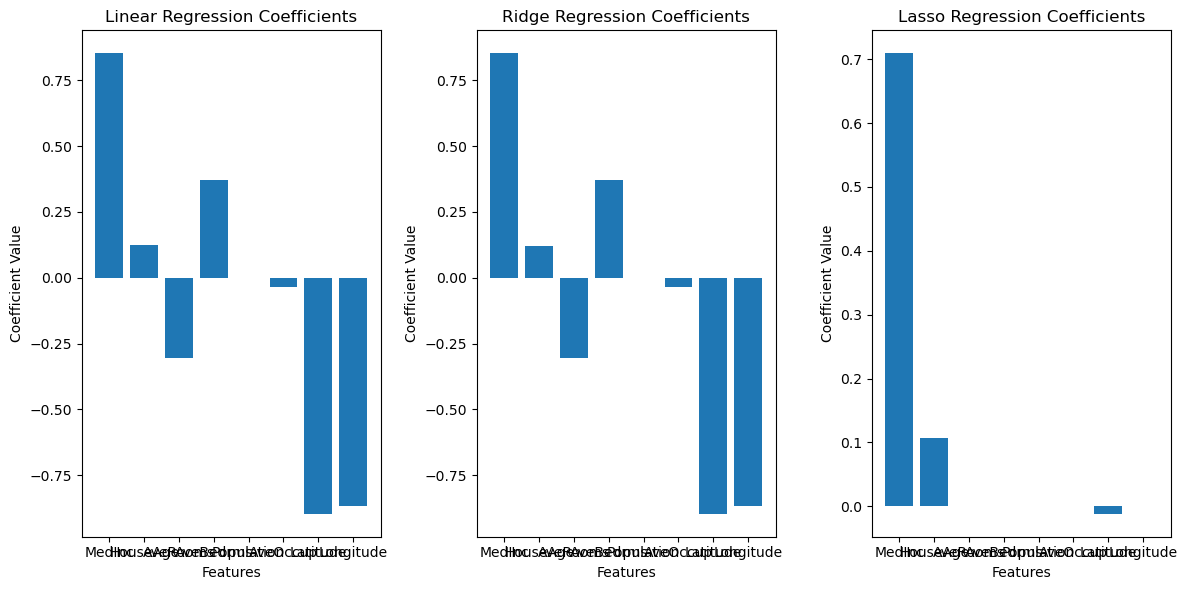

In [43]:
# Visualize the coefficients of each model
plt.figure(figsize=(12, 6))

# Linear Regression Coefficients
plt.subplot(1, 3, 1)
plt.bar(california_housing.feature_names, linear_reg.coef_)
plt.title('Linear Regression Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')

# Ridge Regression Coefficients
plt.subplot(1, 3, 2)
plt.bar(california_housing.feature_names, ridge.coef_)
plt.title('Ridge Regression Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')

# Lasso Regression Coefficients
plt.subplot(1, 3, 3)
plt.bar(california_housing.feature_names, lasso.coef_)
plt.title('Lasso Regression Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')

plt.tight_layout()
plt.show()


- In the **Linear Regression** plot, you will see the original coefficients.
- In the **Ridge Regression** plot, the coefficients will be **shrunk** compared to Linear Regression.
- In the **Lasso Regression** plot, some coefficients may be **zero**, indicating that those features were **excluded** from the model.

---

### **Step 6: Evaluating the Models**

Finally, let’s evaluate the performance of each model on the test set. We'll compute the **Mean Squared Error (MSE)** for each model to see how well they perform.

In [45]:
from sklearn.metrics import mean_squared_error

# Predict on the test set
y_pred_linear = linear_reg.predict(X_test)
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)

# Calculate the MSE for each model
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

# Print the results
print(f"Linear Regression MSE: {mse_linear}")
print(f"Ridge Regression MSE: {mse_ridge}")
print(f"Lasso Regression MSE: {mse_lasso}")


Linear Regression MSE: 0.5558915986952442
Ridge Regression MSE: 0.5558512007367511
Lasso Regression MSE: 0.6795515190149223


- **MSE** tells us how well the model is performing: the lower the MSE, the better the model is at predicting house values.
- We might find that **Ridge** and **Lasso** models perform better than **Linear Regression** by reducing overfitting, especially in cases where some features are irrelevant or noisy.

---

### **Conclusion**

- **Linear Regression** provides a baseline, fitting the data with no regularization. However, it can overfit if the model is too complex or features are correlated.
- **Ridge Regression** (L2 regularization) helps prevent overfitting by shrinking the coefficients.It’s useful when you have many features and want to keep all of them in the model.
- **Lasso Regression** (L1 regularization) performs both regularization and **feature selection**. It can shrink some coefficients to zero, effectively eliminating features that don’t contribute much to the prediction.